In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
import gspread
import pandas as pd
from oauth2client.service_account import ServiceAccountCredentials

In [83]:
cred_file = "/content/drive/MyDrive/Task 3/speedy-district-233015-1502b63ad5d3.json"
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
creds = ServiceAccountCredentials.from_json_keyfile_name(cred_file, scope)
client = gspread.authorize(creds)

In [84]:
client

In [85]:
database = client.open("crop_recommendation")

In [86]:
wks = database.worksheet("Crop_recommendation")
wks

<Worksheet 'Crop_recommendation' id:770161545>

In [87]:
list_wks = database.worksheets()
list_wks

[<Worksheet 'Crop_recommendation' id:770161545>,
 <Worksheet 'Sheet1' id:1005175129>,
 <Worksheet 'Sheet2' id:663765297>,
 <Worksheet 'new_analysis' id:1094116555>,
 <Worksheet 'new_analysis1' id:289243154>,
 <Worksheet 'new_analysis2' id:1530143028>]

In [89]:
database.add_worksheet("new_analysis3","100","20")

<Worksheet 'new_analysis3' id:1752843637>

In [90]:
database.url

'https://docs.google.com/spreadsheets/d/1VoDSovZmnMu7dl0PIYf_vFV6TaT7W5InLT7_Naqu-r8'

In [91]:
df = pd.DataFrame(wks.get_all_records())
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee
2200,90,42,43,20.879744,82.002744,6.502985,202.935536,muskmelon


In [92]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [93]:
colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

In [94]:
print("The Shape of the Dataset is: {}" .format(df.shape))
print("The number of the columns in the Dataset is: {}" .format(df.shape[1]))
print("The Shape of the row in the Dataset is: {}" .format(df.shape[0]))

The Shape of the Dataset is: (2202, 8)
The number of the columns in the Dataset is: 8
The Shape of the row in the Dataset is: 2202


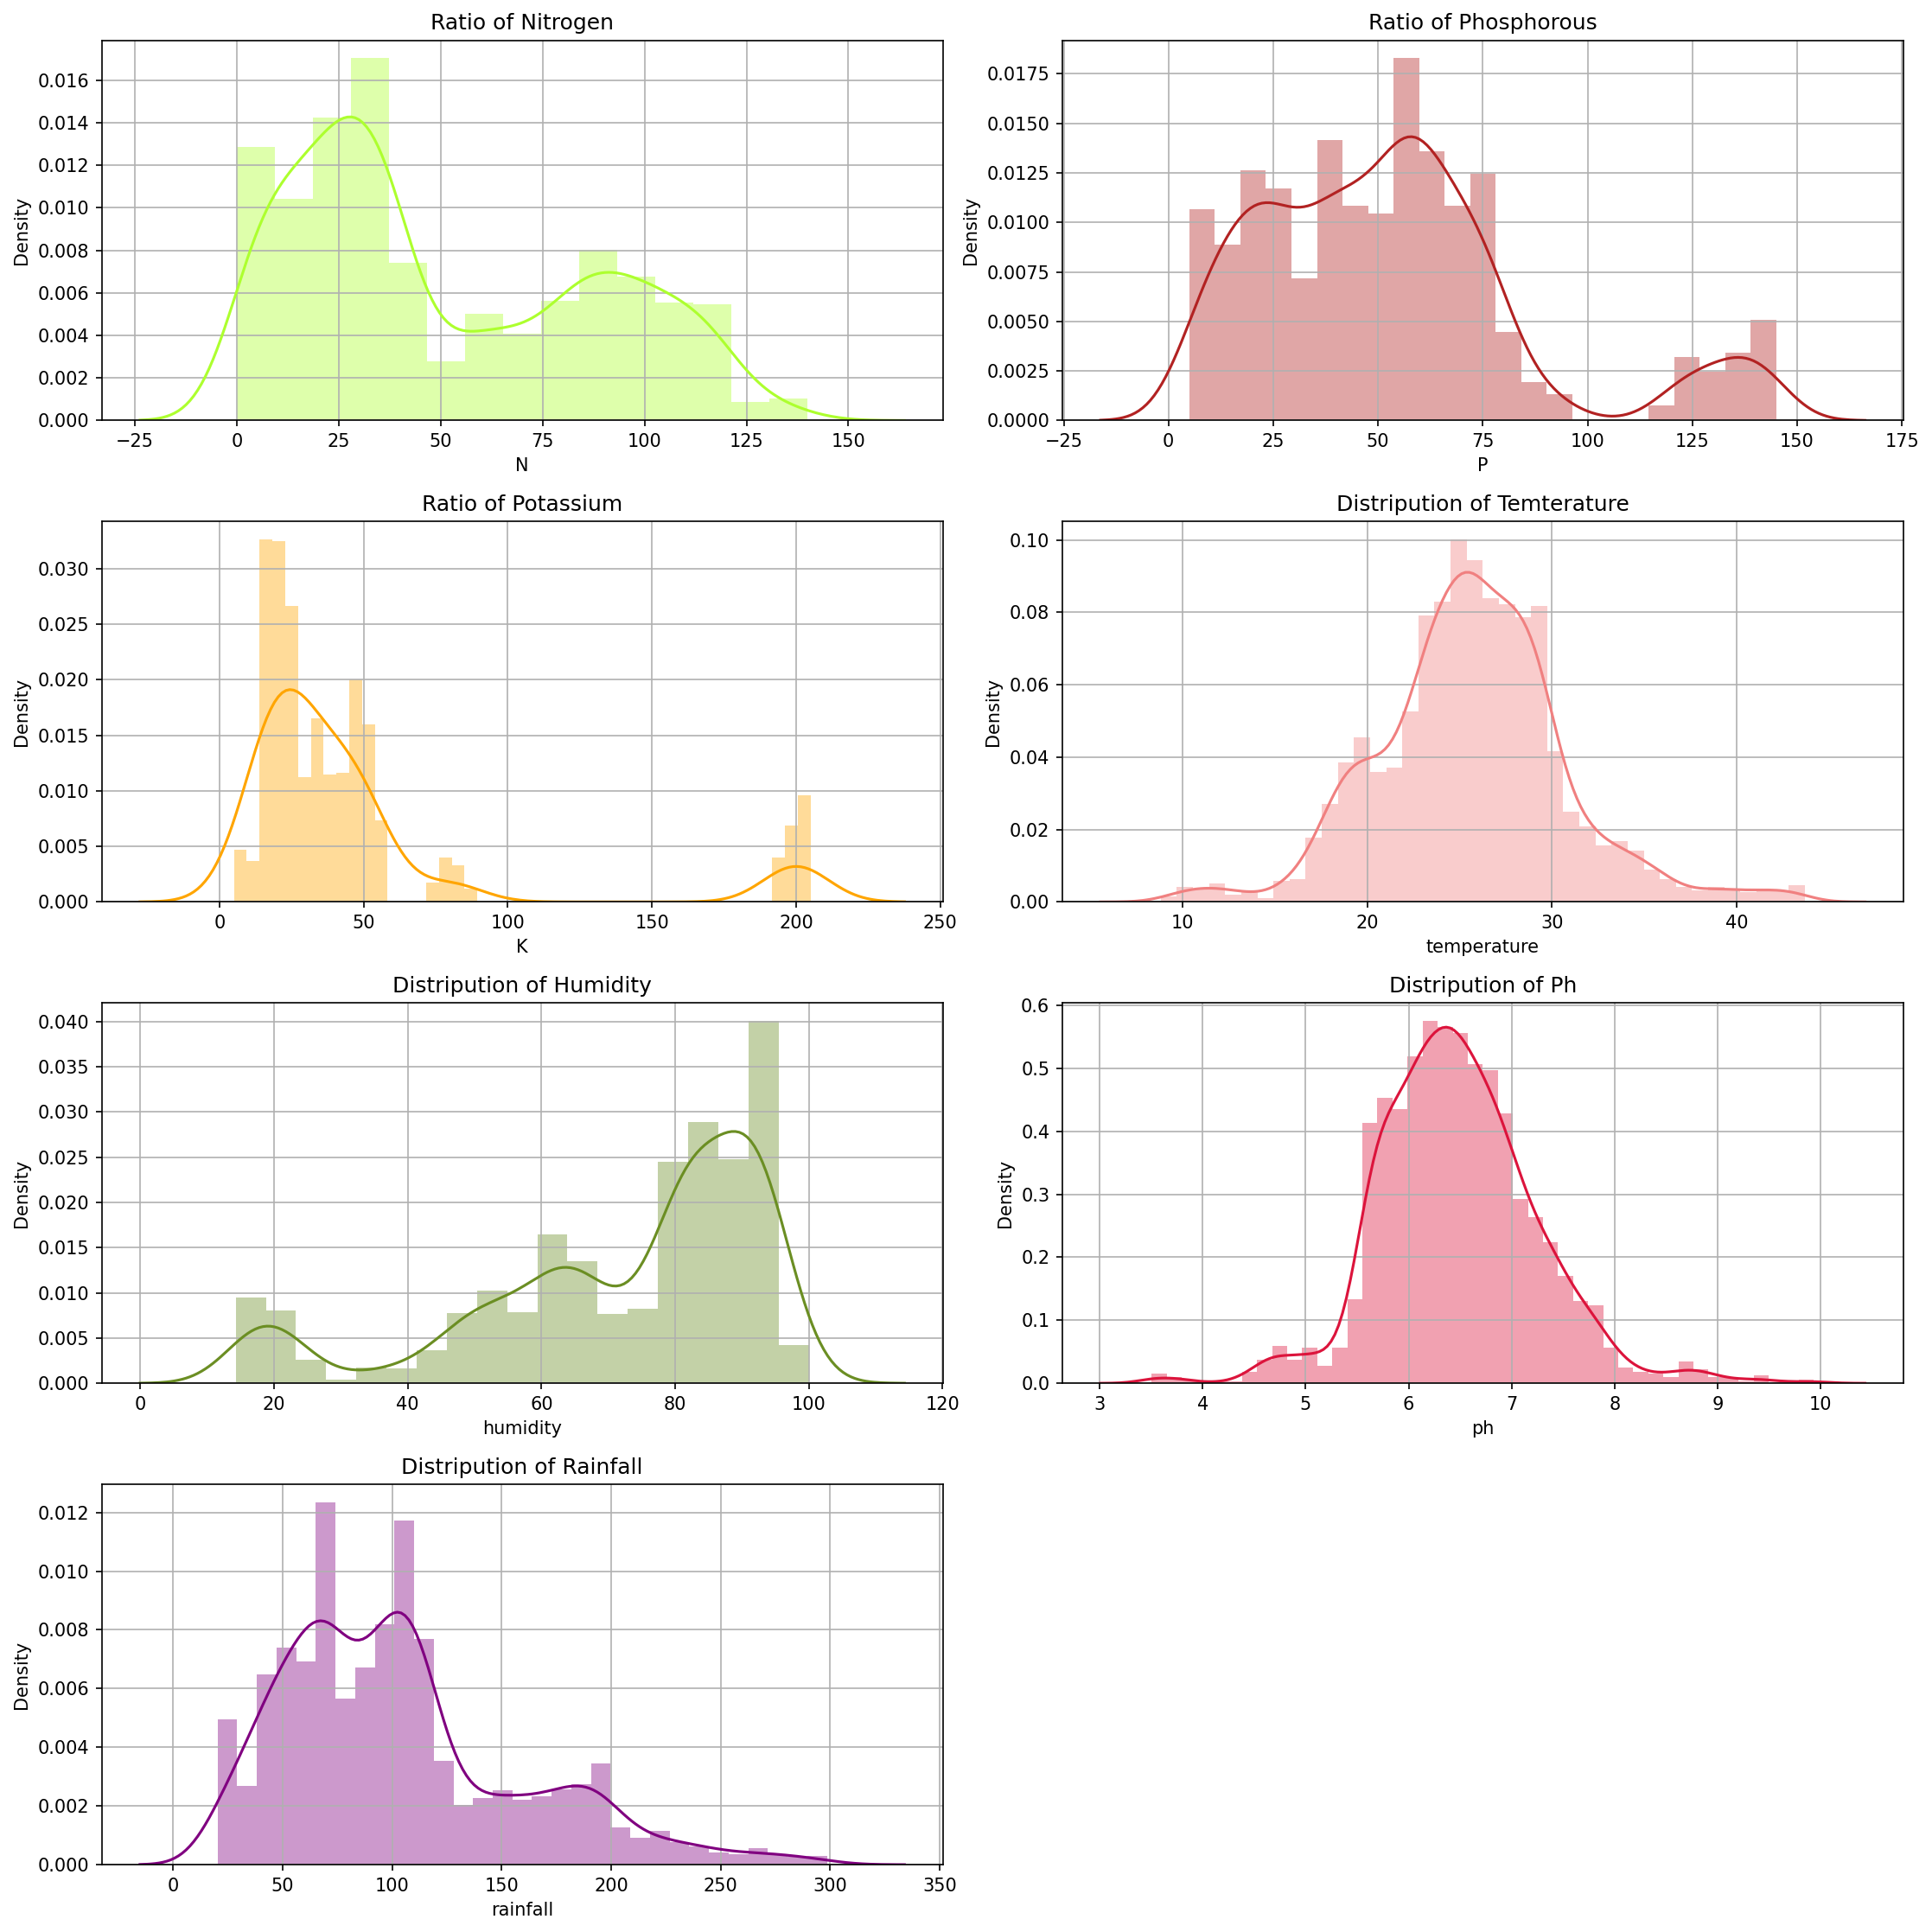

In [95]:
## over all distribution

plt.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['figure.dpi'] = 150

# ratio of Nitrogen content in soil
plt.subplot(4, 2, 1)
sns.distplot(df['N'], color='greenyellow')
plt.title('Ratio of Nitrogen', fontsize = 12)
plt.tight_layout()
plt.grid()

# ratio of Phosphorous content in soil
plt.subplot(4, 2, 2)
sns.distplot(df['P'], color='firebrick')
plt.title('Ratio of Phosphorous', fontsize = 12)
plt.tight_layout()
plt.grid()

# ratio of Potassium content in soil
plt.subplot(4, 2, 3)
sns.distplot(df['K'], color = 'orange')
plt.title('Ratio of Potassium', fontsize = 12)
plt.tight_layout()
plt.grid()

# temperature in degree Celsius
plt.subplot(4, 2, 4)
sns.distplot(df['temperature'], color = 'lightcoral')
plt.title('Distripution of Temterature', fontsize = 12)
plt.tight_layout()
plt.grid()

# humidity - relative humidity in %
plt.subplot(4, 2, 5)
sns.distplot(df['humidity'], color = 'olivedrab')
plt.title('Distripution of Humidity', fontsize = 12)
plt.tight_layout()
plt.grid()

# ph - ph value of the soil
plt.subplot(4, 2, 6)
sns.distplot(df['ph'], color = 'crimson')
plt.title('Distripution of Ph', fontsize = 12)
plt.tight_layout()
plt.grid()

# rainfall - rainfall in mm
plt.subplot(4, 2, 7)
sns.distplot(df['rainfall'], color = 'purple')
plt.title('Distripution of Rainfall', fontsize = 12)
plt.tight_layout()
plt.grid()

In [96]:
print("Question.No 1. Crops which requires very High Ratio of Nitrogen Content in Soil ? \n\nData: The answer is : {}" .format(df[df['N'] > 120]['label'].unique()))
print("\n\nQuestion.No 2. Crops which requires very High Ratio of Phosphorous Content in Soil ? \n\nData: The answer is : {}" .format(df[df['P'] > 100]['label'].unique()))
print("\n\nQuestion.No 3. Crops which requires very High Ratio of Potassium Content in Soil ? \n\nData: The answer is : {}" .format(df[df['K'] > 200]['label'].unique()))
print("\n\nQuestion.No 4. Crops which requires very High Rainfall ? \n\nData: The answer is : {}" .format(df[df['rainfall'] > 200]['label'].unique()))
print("\n\nQuestion.No 5. Crops which requires very Low Temperature ? \n\nData: The answer is : {}" .format(df[df['temperature'] < 10]['label'].unique()))
print("\n\nQuestion.No 6. Crops which requires very High Temperature ? \n\nData: The answer is : {}" .format(df[df['temperature'] > 40]['label'].unique()))
print("\n\nQuestion.No 7. Crops which requires very Low Humidity ? \n\nData: The answer is : {}" .format(df[df['humidity'] < 20]['label'].unique()))
print("\n\nQuestion.No 8. Crops which requires very Low pH ? \n\nData: The answer is : {}" .format(df[df['ph'] < 4]['label'].unique()))
print("\n\nQuestion.No 9. Crops which requires very High pH ? \n\nData: The answer is : {}" .format(df[df['ph'] > 9]['label'].unique()))

Question.No 1. Crops which requires very High Ratio of Nitrogen Content in Soil ? 

Data: The answer is : ['cotton']


Question.No 2. Crops which requires very High Ratio of Phosphorous Content in Soil ? 

Data: The answer is : ['grapes' 'apple']


Question.No 3. Crops which requires very High Ratio of Potassium Content in Soil ? 

Data: The answer is : ['grapes' 'apple']


Question.No 4. Crops which requires very High Rainfall ? 

Data: The answer is : ['rice' 'papaya' 'coconut' 'muskmelon']


Question.No 5. Crops which requires very Low Temperature ? 

Data: The answer is : ['grapes']


Question.No 6. Crops which requires very High Temperature ? 

Data: The answer is : ['grapes' 'papaya']


Question.No 7. Crops which requires very Low Humidity ? 

Data: The answer is : ['chickpea' 'kidneybeans']


Question.No 8. Crops which requires very Low pH ? 

Data: The answer is : ['mothbeans']


Question.No 9. Crops which requires very High pH ? 

Data: The answer is : ['mothbeans']


In [97]:
df_label = pd.pivot_table(df, index=['label'], aggfunc='mean')
df_label.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


In [98]:
def intractive_plot(df, feature, name):

    """
    This Function helps to create intractive Chart
    ATTRIBUTE:
    df: original DataFrame
    feature: which column need to be
    name : feature name
    """

    df_label = pd.pivot_table(df, index=['label'], aggfunc='mean')
    df_label_feature = df_label.sort_values(by=feature, ascending = False)

    fig = make_subplots(rows = 1, cols = 2)

    top = {

        'y': df_label_feature[feature][:10].sort_values().index,
        'x': df_label_feature[feature][:10].sort_values()
    }
    last = {

        'y': df_label_feature[feature][-10:].sort_values().index,
        'x': df_label_feature[feature][-10:].sort_values()
    }

    fig.add_trace(
        go.Bar(top,
               name='Least {} Needed'.format(name),
               marker_color = random.choice(colorarr),
               orientation = 'h',
               text = top['x']
              ),
        row = 1, col = 1
    )
    fig.add_trace(
        go.Bar(last,
               name='Least {} Needed'.format(name),
               marker_color = random.choice(colorarr),
               orientation = 'h',
               text = top['x']
              ),
        row = 1, col = 2
    )

    fig.update_traces(texttemplate = '%{text}', textposition = 'inside')
    fig.update_layout(title_text = name,
                      plot_bgcolor = 'white',
                      font_size = 12,
                      font_color = 'black',
                      height = 500
                     )


    fig.update_xaxes(showgrid = False)
    fig.update_yaxes(showgrid = False)
    fig.show()

In [99]:
intractive_plot(df, feature = 'K', name = 'Potassium')

In [100]:
intractive_plot(df, feature = 'N', name = 'Nitrogen')

In [101]:
intractive_plot(df, feature = 'P', name = 'Phosphorous')

In [102]:
intractive_plot(df, feature = 'humidity', name = 'Humidity')

In [103]:
intractive_plot(df, feature = 'temperature', name = 'Temperature')

In [104]:
intractive_plot(df, feature = 'ph', name = 'ph')

In [105]:
intractive_plot(df, feature = 'rainfall', name = 'Rainfall')

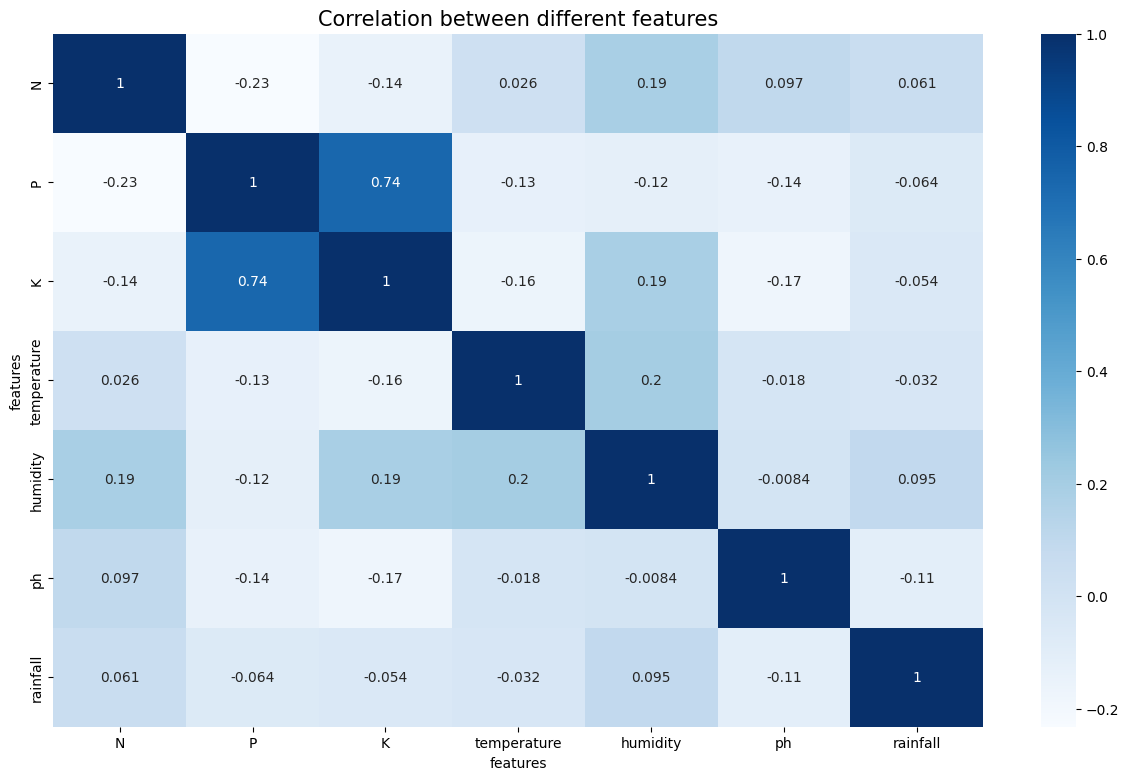

In [106]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9), dpi=100)
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
ax.set(xlabel='features')
ax.set(ylabel='features')
plt.title('Correlation between different features', fontsize = 15, c='black')
# plt.tight_layout()
plt.show()

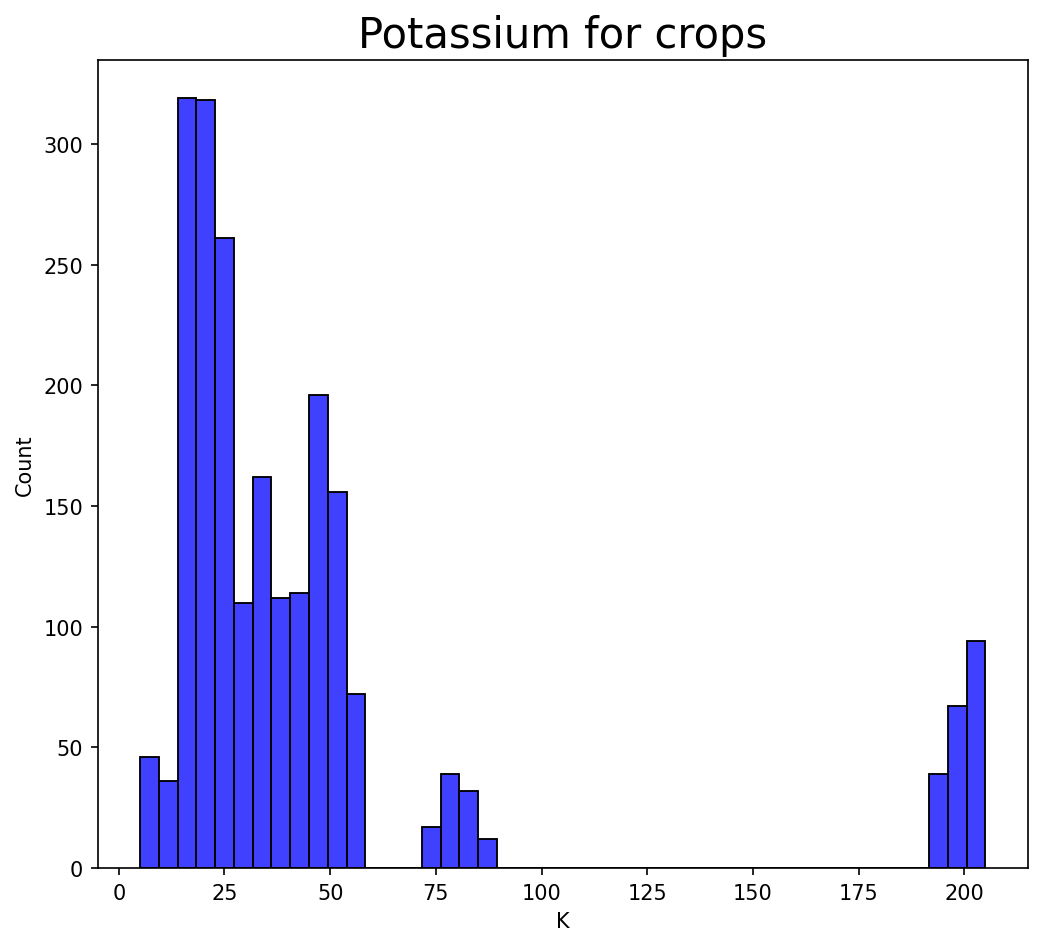

In [107]:
plt.figure(figsize=(8,7))
sns.histplot(x='K',data=df,color='b');
plt.title("Potassium for crops",{'fontsize':20});

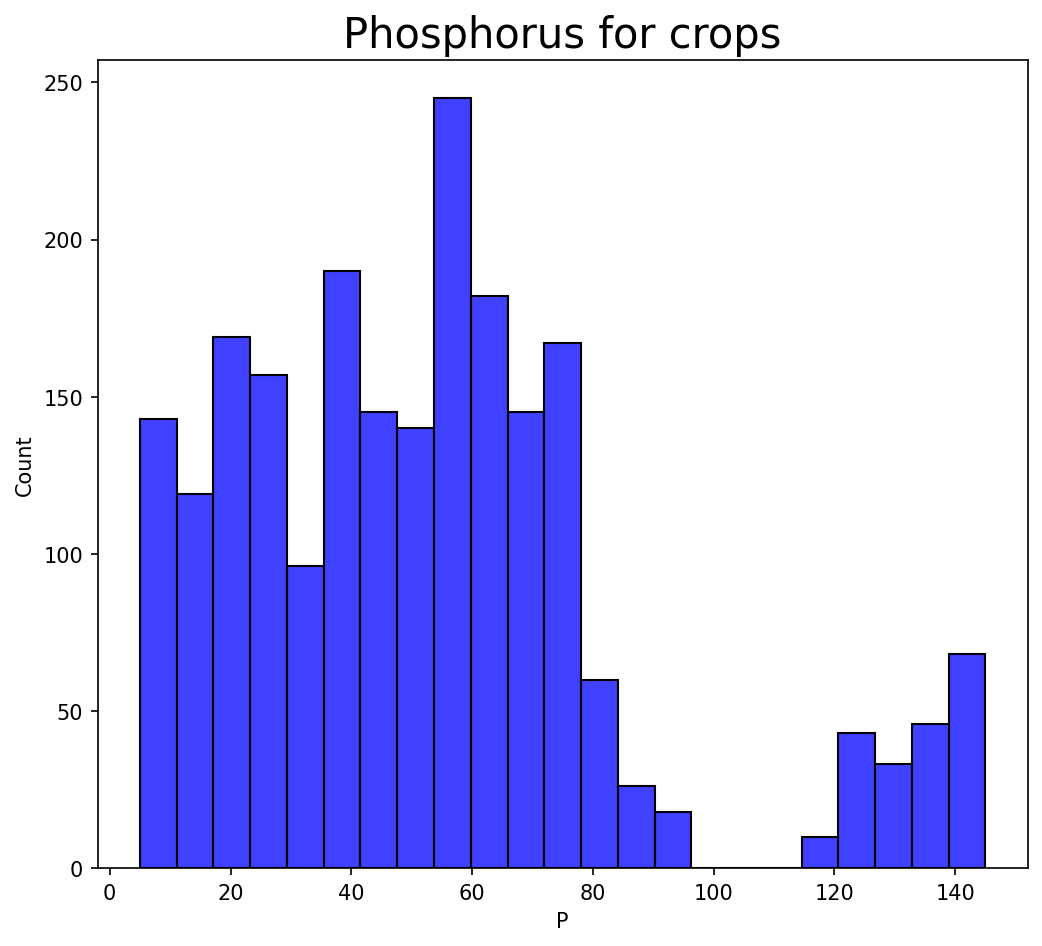

In [108]:
plt.figure(figsize=(8,7))
sns.histplot(x='P',data=df,color='b');
plt.title("Phosphorus for crops",{'fontsize':20});

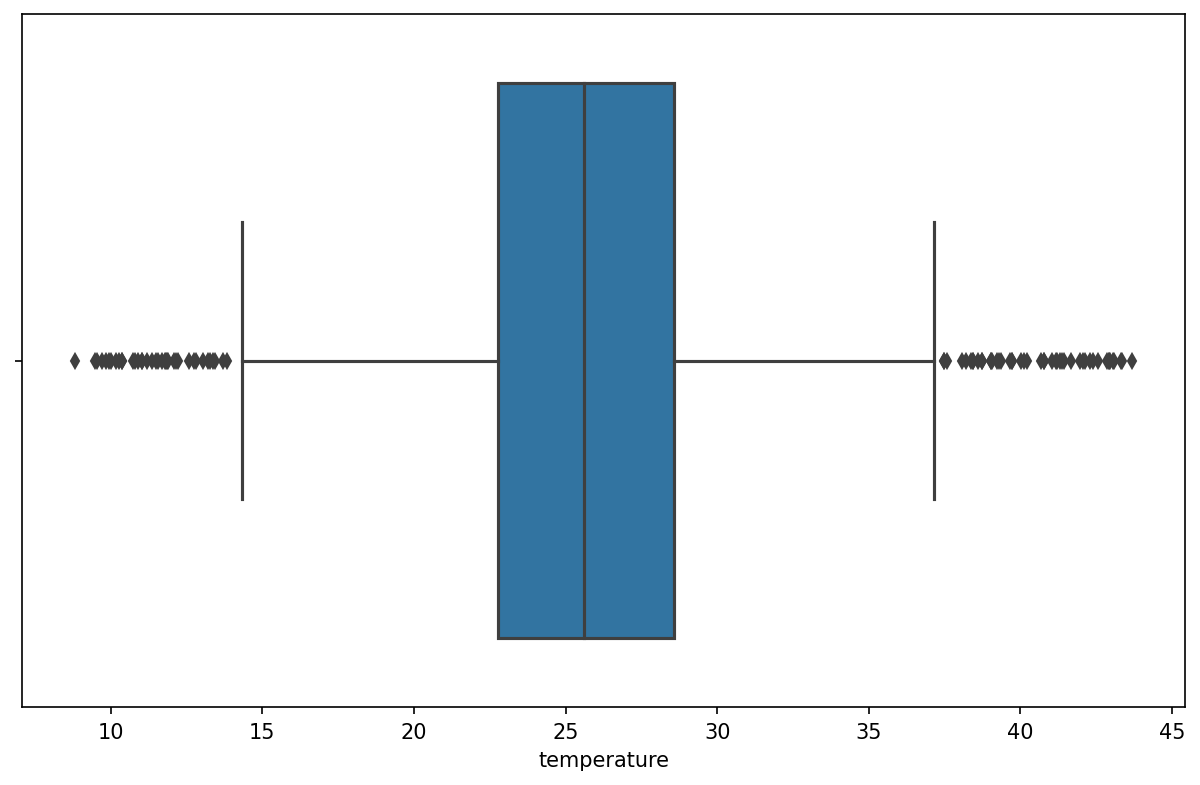

In [109]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df.temperature);

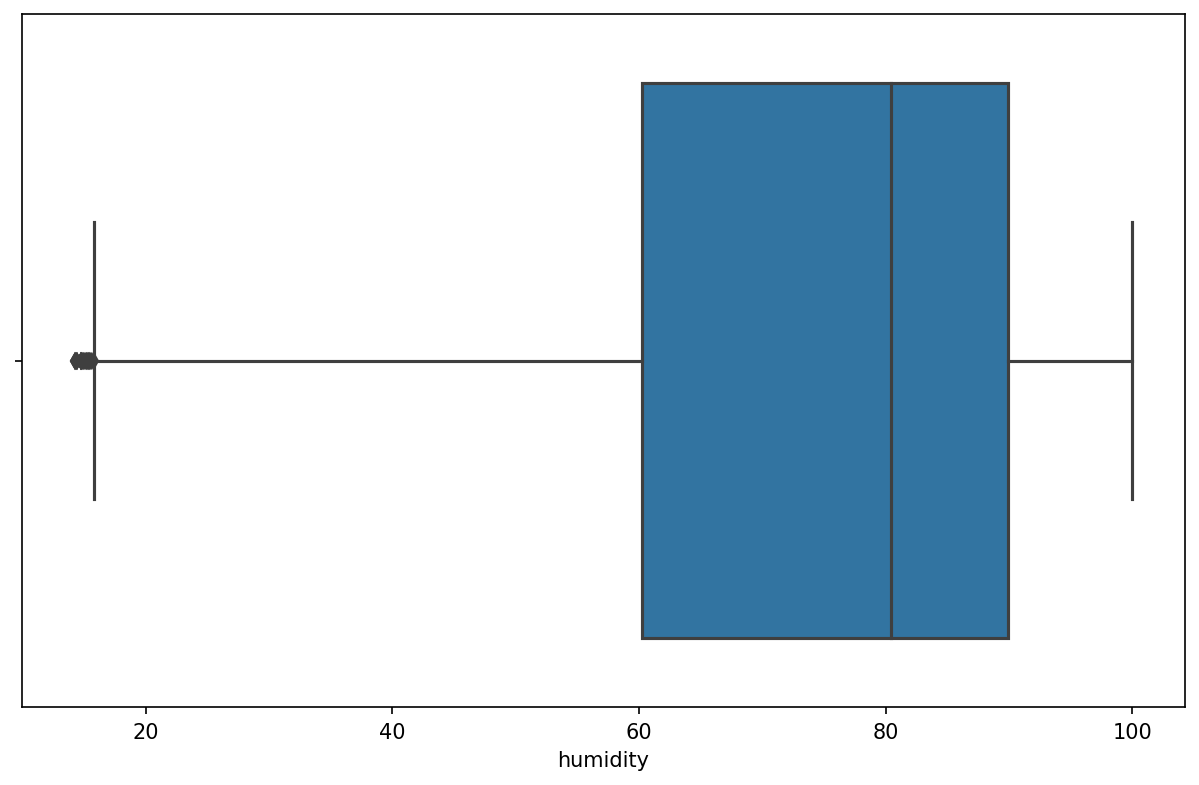

In [110]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df.humidity);

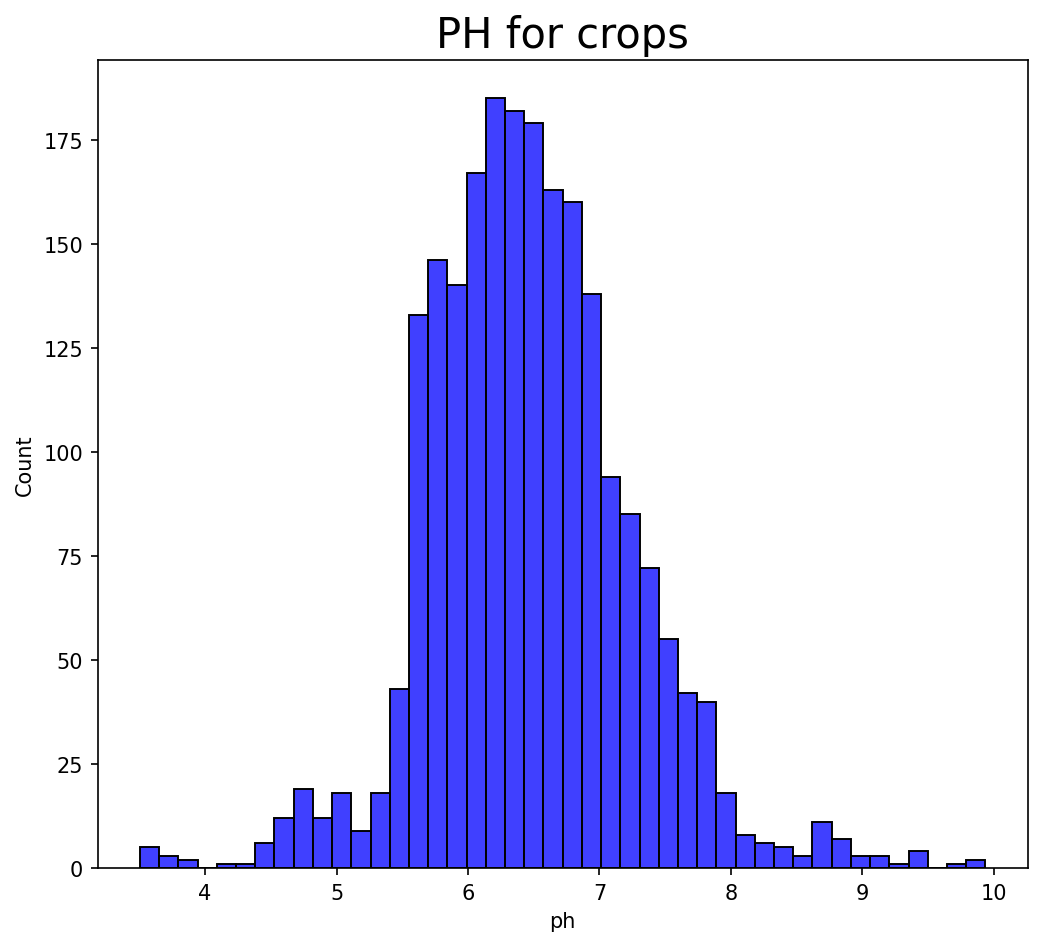

In [111]:
plt.figure(figsize=(8,7))
sns.histplot(x='ph',data=df,color='b');
plt.title("PH for crops",{'fontsize':20});

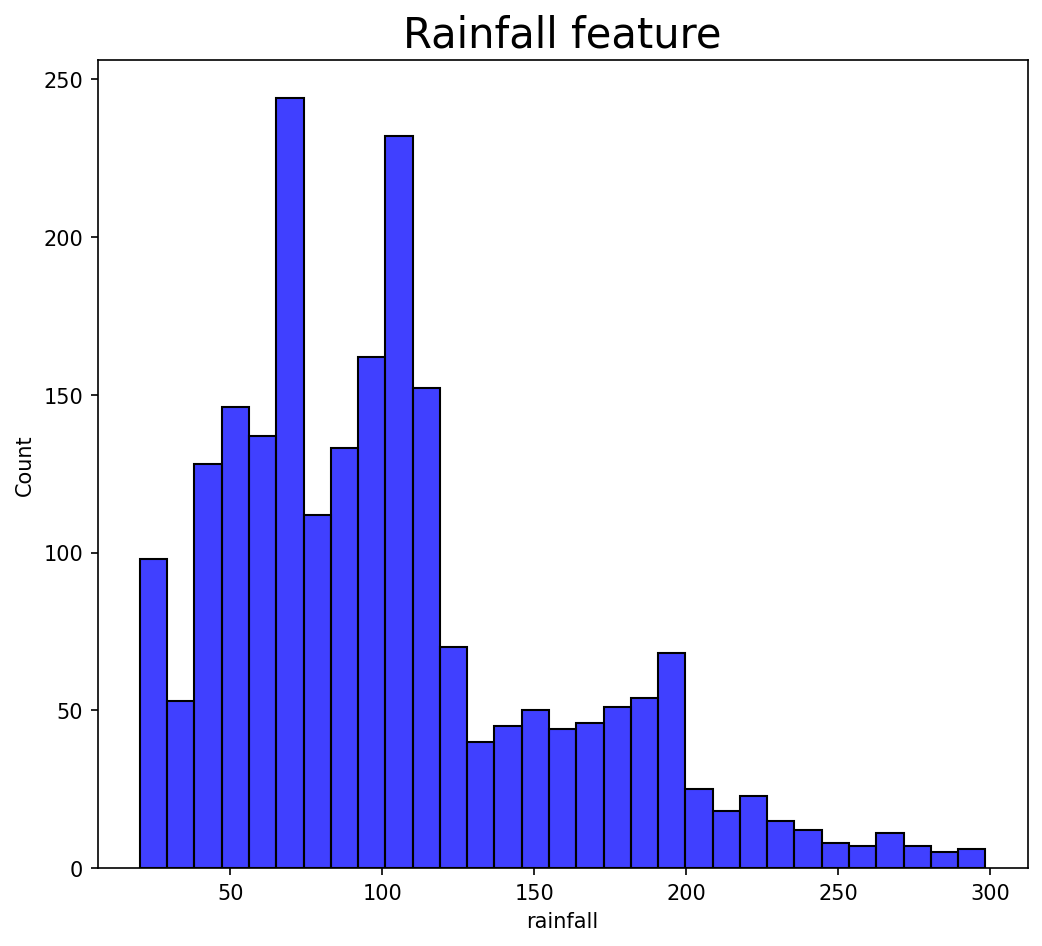

In [112]:
plt.figure(figsize=(8,7))
sns.histplot(x='rainfall',data=df,color='b');
plt.title("Rainfall feature",{'fontsize':20});

In [113]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [114]:
X = df.drop('label', axis =1)
y = df['label']

In [115]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [116]:
X_train.head()

,N,P,K,temperature,humidity,ph,rainfall
1723,34,62,55,27.585489,90.725265,6.585346,238.500878
563,28,57,17,30.477577,61.582453,9.416003,61.866339
1705,70,68,45,33.835086,92.854702,6.991626,203.404403
1035,116,71,47,27.572781,82.063888,6.435786,91.342765
2033,72,51,40,23.206835,74.099570,7.422318,199.476678


In [117]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [118]:
models = {
    LogisticRegression(max_iter=500):'Logistic Regression',
    RandomForestClassifier():'Random Forest',
    SVC():'Support Vector Machine'
}
for m in models.keys():
    m.fit(X_train,y_train)
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(X_test,y_test)*100,"%")

Accuracy Score for Logistic Regression is :  97.27891156462584 %
Accuracy Score for Random Forest is :  99.54648526077098 %
Accuracy Score for Support Vector Machine is :  98.4126984126984 %


In [119]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [120]:
y_pred = rf.predict(X_test)

In [121]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        21
      banana       1.00      1.00      1.00        24
   blackgram       1.00      1.00      1.00        25
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        28
      coffee       1.00      1.00      1.00        16
      cotton       1.00      1.00      1.00        23
      grapes       1.00      1.00      1.00        21
        jute       1.00      1.00      1.00        14
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        16
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        18
   mothbeans       1.00      1.00      1.00        16
    mungbean       1.00      1.00      1.00        11
   muskmelon       1.00      1.00      1.00        25
      orange       1.00      1.00      1.00        20
      papaya       1.00    

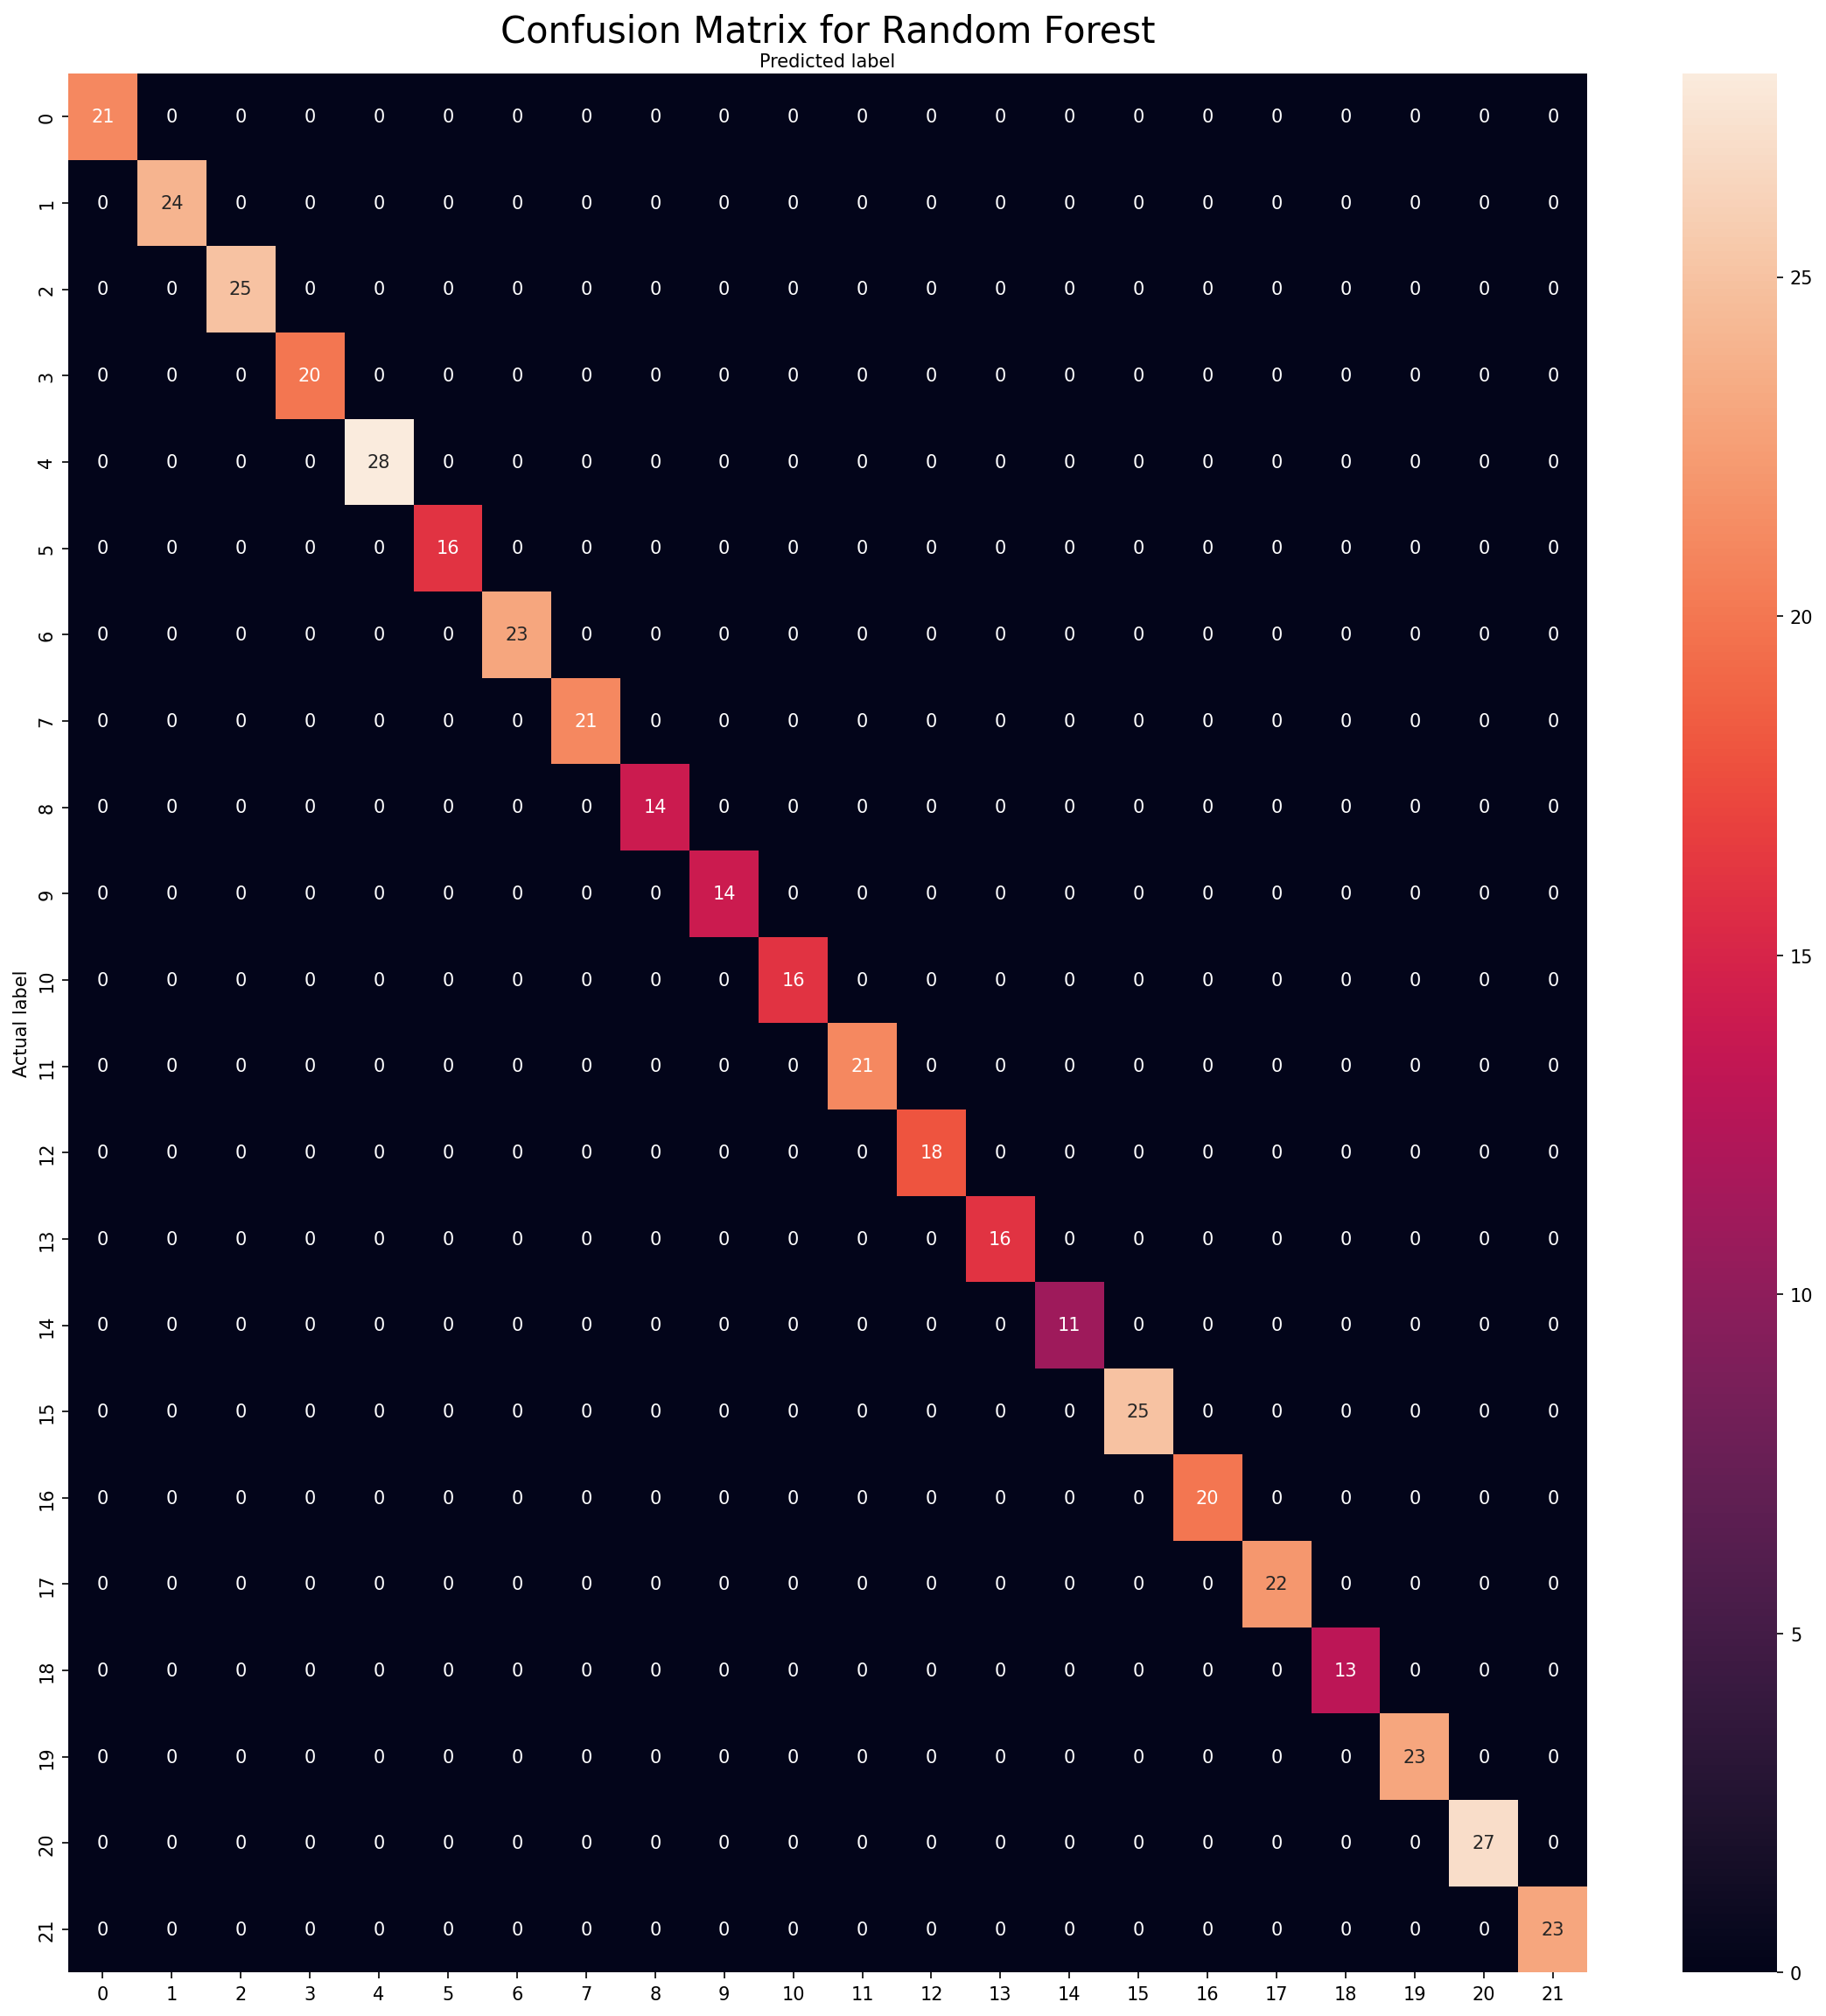

In [122]:
class_names = np.arange(0,21)
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
cnf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True,fmt = 'd')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title(f'Confusion Matrix for Random Forest', {'fontsize':20})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [123]:
# Finding a Keyword from our Selected Worksheet

word = "rice"
cell = wks.find(word)
cell
key_row = cell.row
key_col = cell.col
print(key_col,key_row)

8 2


In [124]:
wks.cell(3,1).value

'85'

In [125]:
# Total number of row
n = wks.col_values(2)
len(n)

2203

In [126]:
# Access the Google Sheets
# Define the data to update
row_to_update = 2202
new_data = [90, 42, 43, 20.87974371, 82.00274423, 6.502985292, 202.9355362, "muskmelon"]
for col, value in enumerate(new_data, start=1):
    wks.update_cell(row_to_update, col, value)

In [127]:
row_to_update = 2203
new_data = [85, 40, 38, 19.87974371, 80.00274423, 6.602985292, 200.9355362, "papaya"]
for col, value in enumerate(new_data, start=1):
    wks.update_cell(row_to_update, col, value)